In [2]:
import pandas as pd
import numpy as np

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
df.head()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

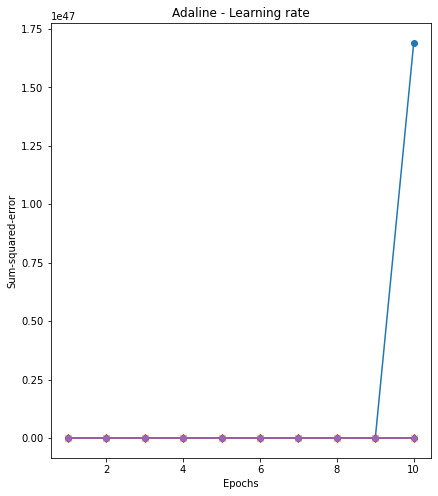

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

#Used different eta starting from 0.1 to 0.00001 decreasing by 1/10 of the previous value. Learning became saturated 
#after first eta. Have used different markers and colors for each eta as depicted in the code below.

ada1 = AdalineGD(n_iter=10, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate')

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='P')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate')

ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[0].plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='d')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate')

ada5 = AdalineGD(n_iter=10, eta=0.00001).fit(X, y)
ax[0].plot(range(1, len(ada5.cost_) + 1), ada5.cost_, marker='h')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate')





# plt.savefig('images/02_11.png', dpi=300)
ax[1].set_visible(False)
plt.show()
